In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] =  18

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets

Compute the Mandelbrot set, $f_c(z) = z^2 + c$, following [this tutorial](https://tomroelandts.com/articles/how-to-compute-the-mandelbrot-set-using-numpy-array-operations).

Here $c$ is taken at every complex number; in this case, it will be the coordinates of the plot. We then iterate on $f_c$, starting with $z=0$, for each of those coordinates. 

In [3]:
golden = (1 + 5 ** 0.5) / 2
n = 1024
m = int(n*golden)

x = np.linspace(-2, 1, num=m).reshape((1, m))
y = np.linspace(-1, 1, num=n).reshape((n, 1))

C = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))

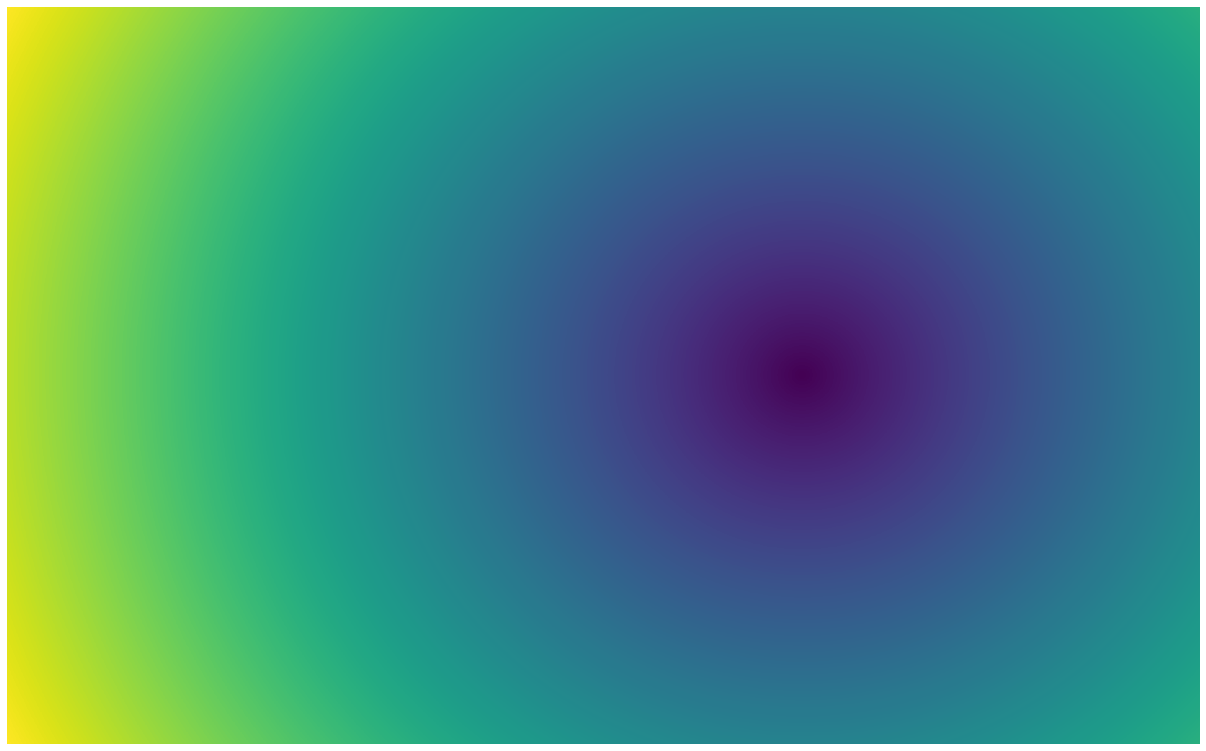

In [4]:
fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(np.abs(C))
plt.show()

In [5]:
Z = np.zeros((n, m), dtype=complex)
M = np.full((n, m), True, dtype=bool)
N = np.zeros((n, m))
for i in range(128):
    Z[M] = Z[M]**2 + C[M]
    M[np.abs(Z) > 2] = False
    N[M] = i

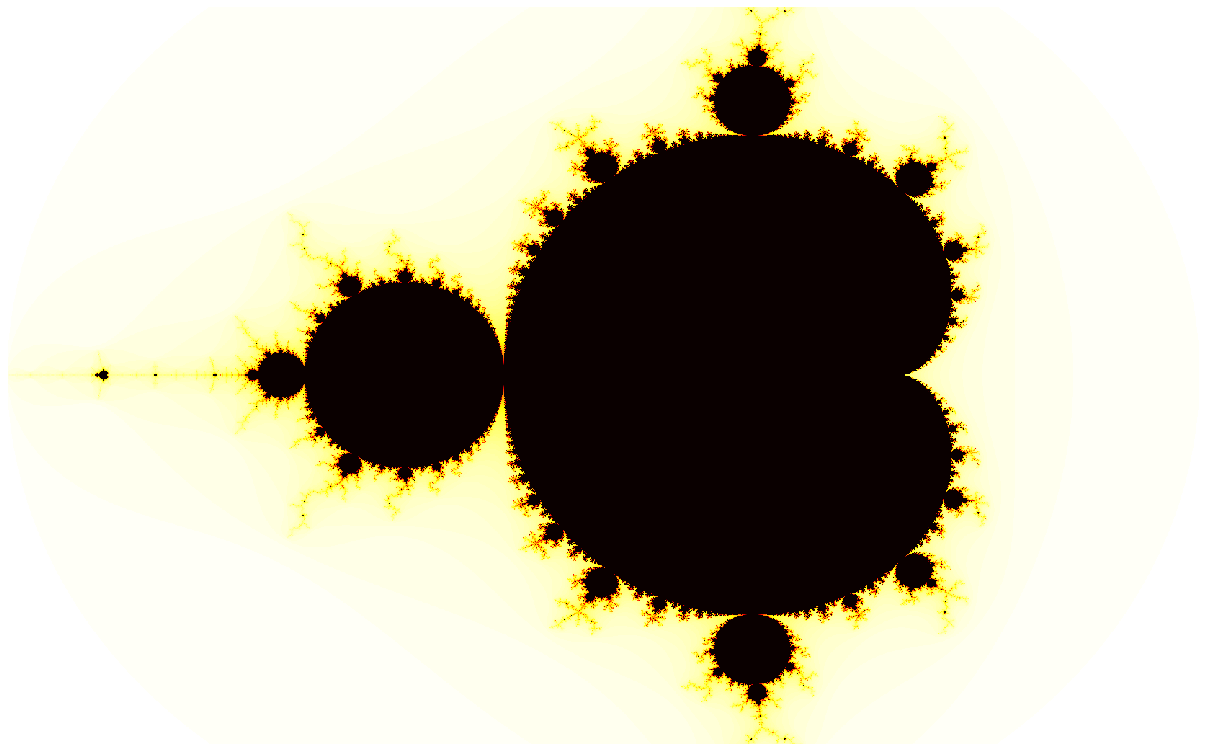

In [6]:
fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(1-N, cmap='hot')
plt.show()

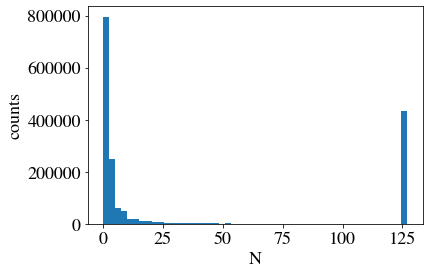

In [7]:
plt.hist(N.flatten(), bins=50)
plt.xlabel('N')
plt.ylabel('counts')
plt.show()

Compute the Julia set, also $f_c(z) = z^2 + c$, following [this tutorial](https://tomroelandts.com/articles/how-to-compute-colorful-fractals-using-numpy-and-matplotlib).

Here $z$ is taken as the coordinates of the plot, and $c$ is some fixed number. In this case we will use $c=-0.4 + 0.6j$. 

In [8]:
#m = 480
#n = 320

s = 1000  # Scale
x = np.linspace(-m / s, m / s, num=m).reshape((1, m))
y = np.linspace(-n / s, n / s, num=n).reshape((n, 1))
Z = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))

In [9]:
C = np.full((n, m), -0.4 + 0.6j)
M = np.full((n, m), True, dtype=bool)
N = np.zeros((n, m))
for i in range(64):
    Z[M] = Z[M]**2 + C[M]
    M[np.abs(Z) > 2] = False
    N[M] = i

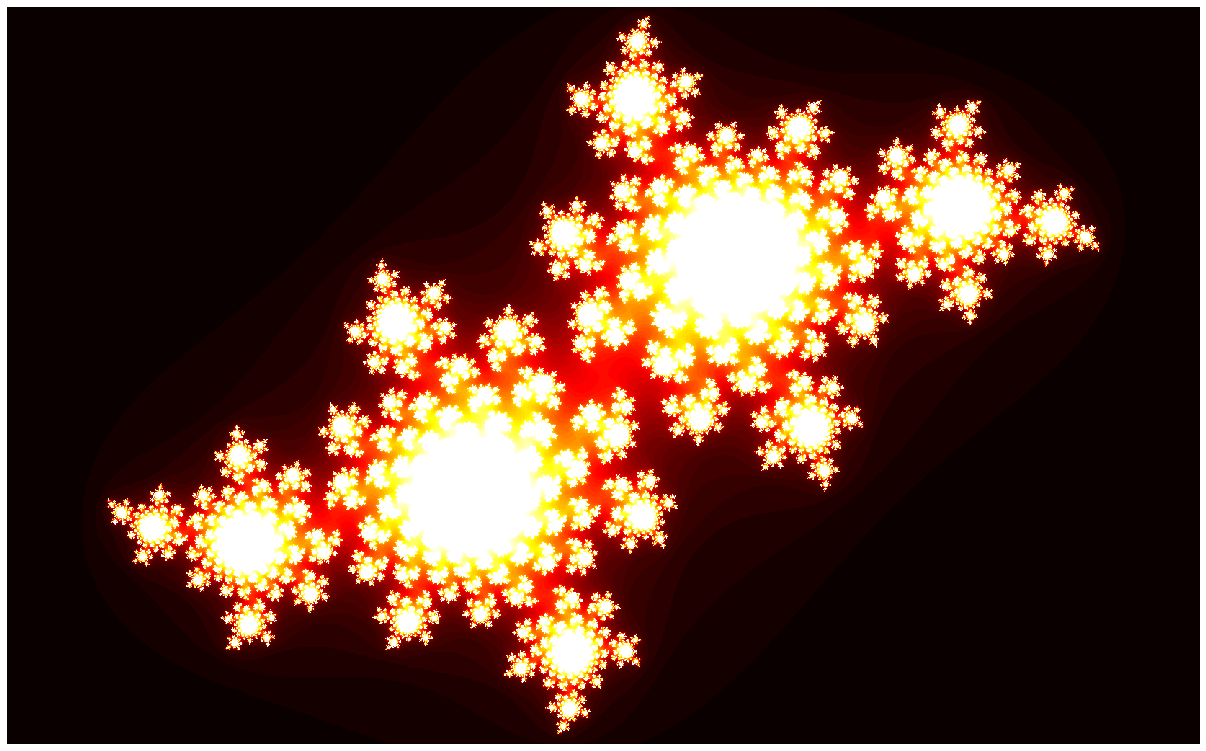

In [10]:
fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(N, cmap='hot')
plt.savefig('julia-plt.png')
plt.show()

In [12]:
def julia(s=1000, k=64, re=-0.4, im=0.6, cutoff=2, xoff=0, yoff=0):
    golden = (1 + 5 ** 0.5) / 2
    n = 128
    m = int(n*golden)
    
    x = np.linspace(-m / s, m / s, num=m).reshape((1, m)) + xoff
    y = np.linspace(-n / s, n / s, num=n).reshape((n, 1)) + yoff
    Z = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
    
    #C = np.full((n, m), -0.4 + 0.6j)
    C = np.full((n, m), re + im*(1j))
    M = np.full((n, m), True, dtype=bool)
    N = np.zeros((n, m))
    for i in range(k):
        Z[M] = Z[M]**2 + C[M]
        M[np.abs(Z) > cutoff] = False
        N[M] = i
    
    fig = plt.figure()
    fig.set_size_inches(m / 25, n / 25)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(N, cmap='hot')
    plt.show()

interact(julia,
        s=IntSlider(value=1000, min=1, max=10000, step=1),
        k=IntSlider(value=64, min=4, max=196, step=1),
        re=FloatSlider(value=-0.4, min=-10, max=10, step=0.001),
        im=FloatSlider(value=-0.6, min=-10, max=10, step=0.001),
        cutoff=FloatSlider(value=2, min=1, max=3, step=0.01),
        xoff=FloatSlider(value=0, min=-10, max=10, step=0.001),
        yoff=FloatSlider(value=0, min=-10, max=10, step=0.001));

interactive(children=(IntSlider(value=1000, description='s', max=10000, min=1), IntSlider(value=64, descriptio…

Chaos game to make the [Sierpinski triangle](https://www.johndcook.com/blog/2017/07/08/the-chaos-game-and-the-sierpinski-triangle/)

In [13]:
def midpoint(p, q):
    return ((p[0] + q[0])/2, (p[1] + q[1])/2)

# Three corners of an equilateral triangle
corner = [(0, 0), (0.5, np.sqrt(3)/2), (1, 0)]

N = 100000
x = np.zeros(N)
y = np.zeros(N)

x[0] = np.random.random()
y[0] = np.random.random()
for i in tqdm_notebook(range(1, N)):
    c = corner[np.random.randint(0, 3)] # random triangle vertex
    x[i], y[i] = midpoint( c, (x[i-1], y[i-1]) )

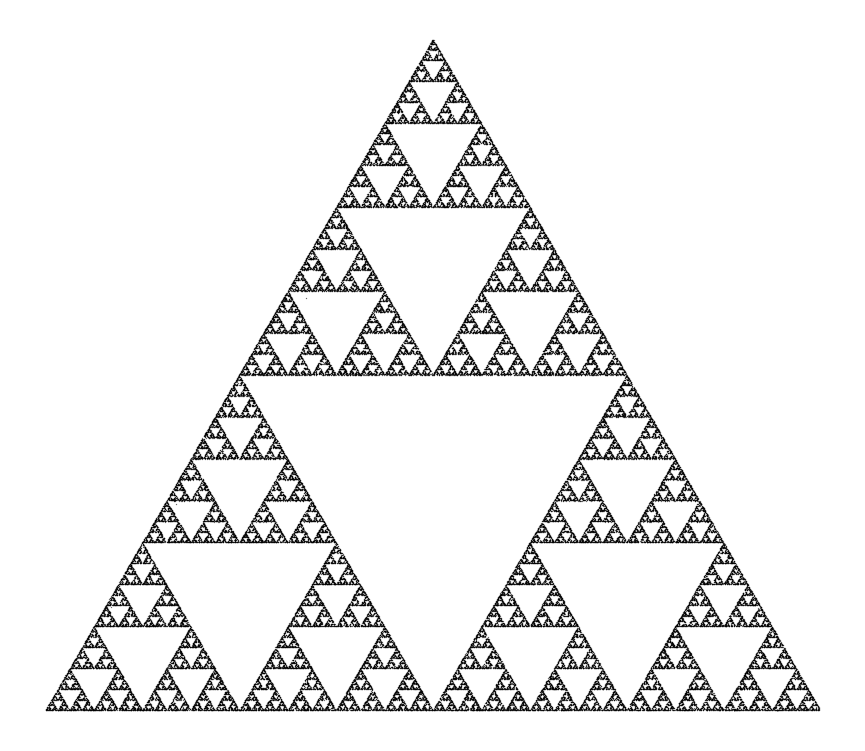

In [14]:
golden = (1 + 5 ** 0.5) / 2
n = 1024
m = int(n*golden)

fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(x, y, 'k.', ms=0.5)
plt.show()

Plot fractals from [Fractals in Mathematics](http://mate.dm.uba.ar/~umolter/materias/multifractal-2014/Papers/Paper-elegido%20por%20Fernando.pdf)

\begin{align}
    F_1(z) &= \alpha z + \beta \bar z \\
    F_2(z) &= \gamma (z-1) + \delta (\bar z - 1) + 1
\end{align}
with
\begin{align}
    (a)\;&\left(0.4614+0.4614i,\; 0,\; 0.622-0.196i,\; 0\right)
  \\(b)\;&\left(0,\; \frac{3+3i}{10},\; 0,\; \frac{41}{50}\right)
  \\(c)\;&\left(0,\; \frac{1+i}{2}\;, 0,\; \frac{i-1}{2}\right)
  \\(d)\;&\left(0.4614+0.4614i,\; 0,\; 0,\; 0.2896-0.585i\right)
\end{align}

In [15]:
def F1(z, alpha, beta):
    return alpha*z + beta*np.conjugate(z)

def F2(z, gamma, delta):
    return gamma*(z-1) + delta*(np.conjugate(z)-1) + 1

In [16]:
alpha = 0.4614 + 0.4614j
beta  = 0
gamma = 0.622 - 0.196j
delta = 0

N = 100000
x = np.zeros(N, dtype=complex)
x[0] = np.random.random()

for i in tqdm_notebook(range(1, N)):
    if np.random.randint(2):
        x[i] = F1(x[i-1], alpha, beta)
    else:
        x[i] = F2(x[i-1], gamma, delta)

x = np.array(x)

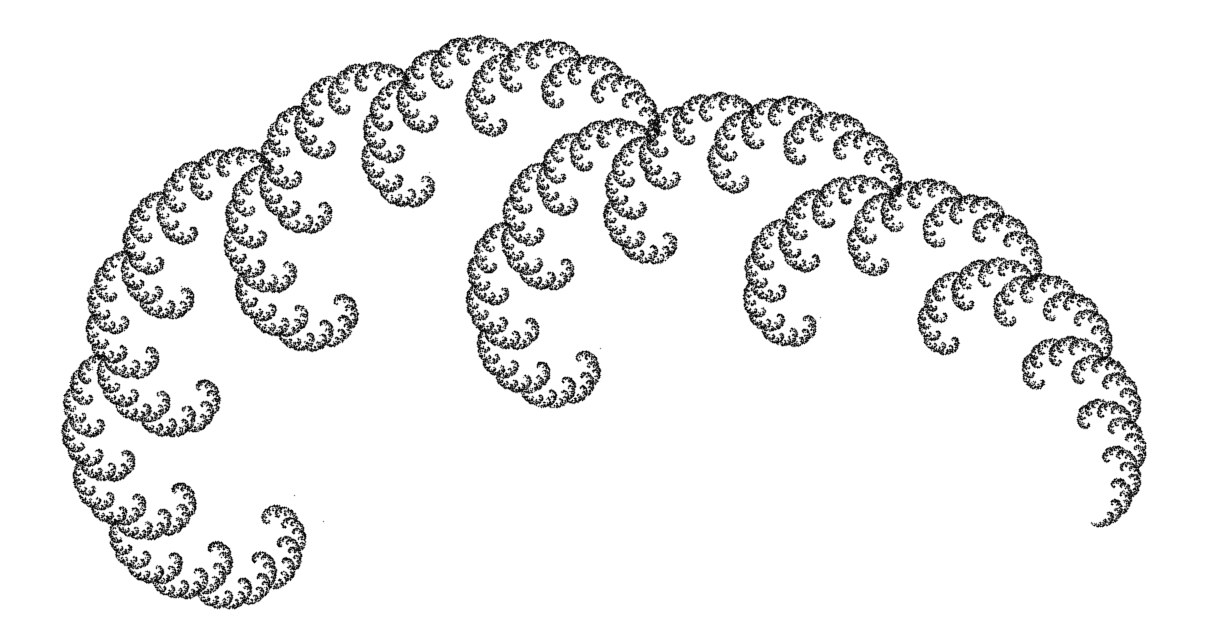

In [17]:
golden = (1 + 5 ** 0.5) / 2
n = 1024
m = int(n*golden)

fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(x.real, x.imag, 'k.', alpha=0.5, ms=1)
plt.show()

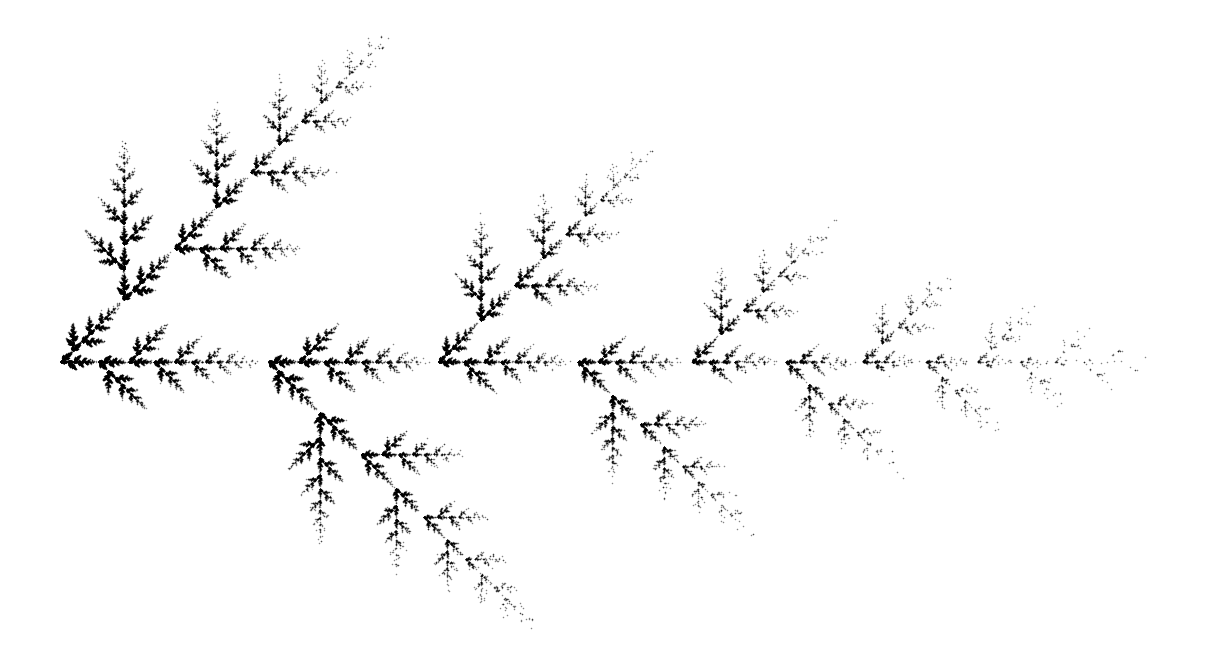

In [18]:
alpha = 0
beta  = (3+3j) / 10
gamma = 0
delta = 41/50

N = 100000
x = np.zeros(N, dtype=complex)
x[0] = np.random.random()

for i in tqdm_notebook(range(1, N)):
    if np.random.randint(2):
        x[i] = F1(x[i-1], alpha, beta)
    else:
        x[i] = F2(x[i-1], gamma, delta)

x = np.array(x)

golden = (1 + 5 ** 0.5) / 2
n = 1024
m = int(n*golden)

fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(x.real, x.imag, 'k.', alpha=0.5, ms=1)
plt.show()

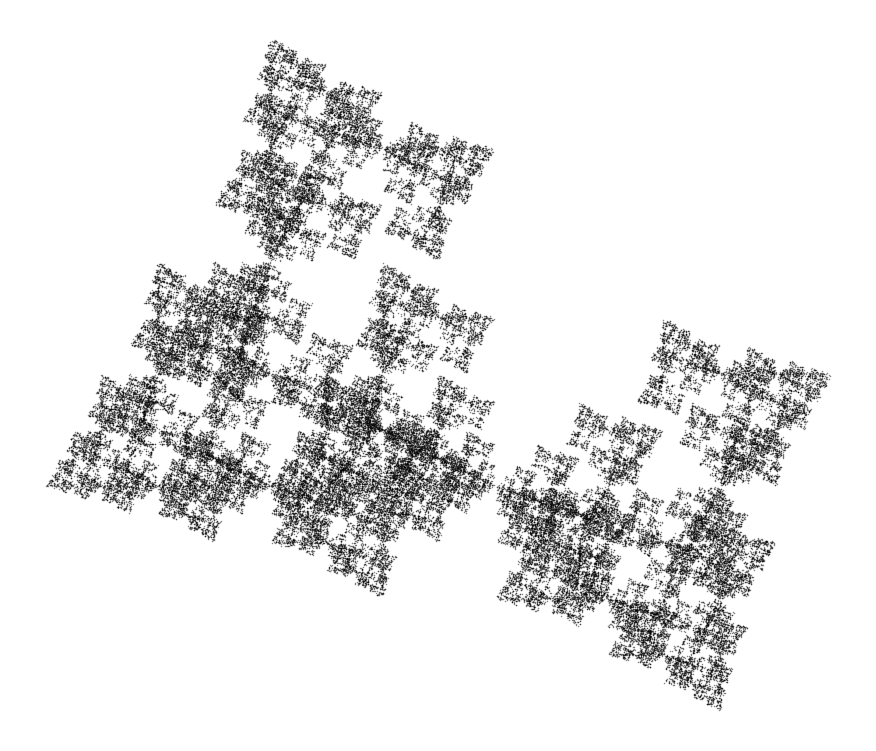

In [19]:
alpha = 0
beta  = (1+1j)/2
gamma = 0
delta = (1j-1)/2

N = 100000
x = np.zeros(N, dtype=complex)
x[0] = np.random.random()

for i in tqdm_notebook(range(1, N)):
    if np.random.randint(2):
        x[i] = F1(x[i-1], alpha, beta)
    else:
        x[i] = F2(x[i-1], gamma, delta)

x = np.array(x)

golden = (1 + 5 ** 0.5) / 2
n = 1024
m = int(n*golden)

fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(x.real, x.imag, 'k.', alpha=0.5, ms=1)
plt.show()

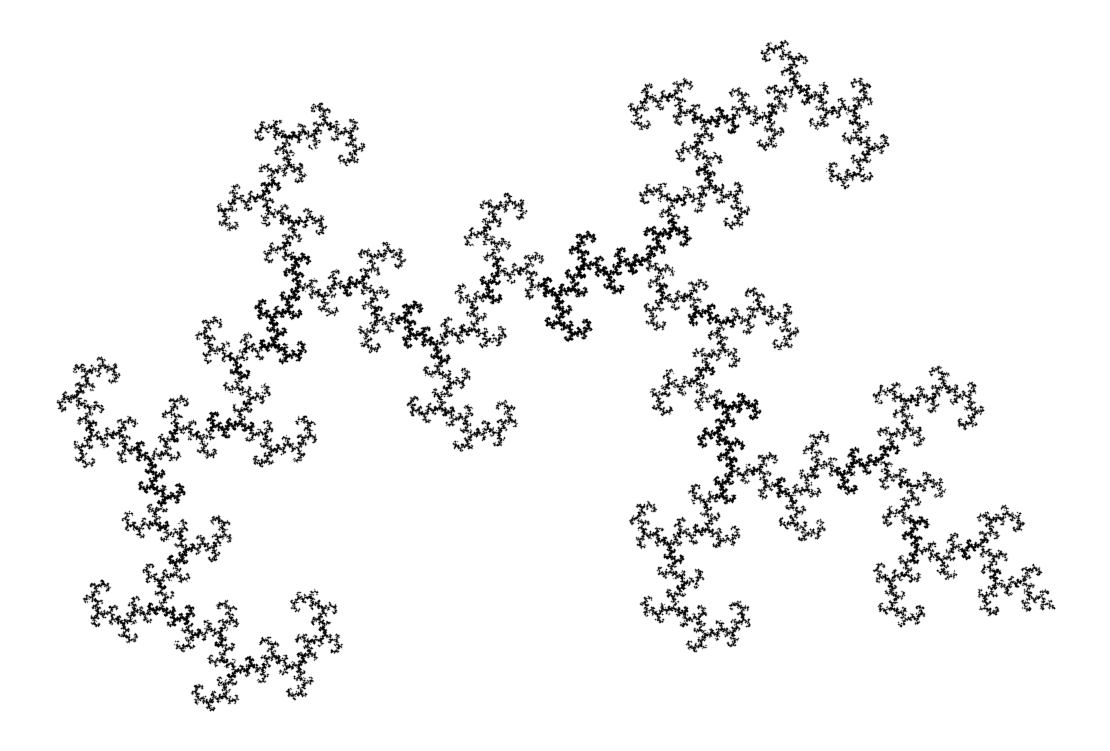

In [20]:
alpha = 0.4614 + 0.4614j
beta  = 0
gamma = 0
delta = 0.2896 - 0.585j

N = 100000
x = np.zeros(N, dtype=complex)
x[0] = np.random.random()

for i in tqdm_notebook(range(1, N)):
    if np.random.randint(2):
        x[i] = F1(x[i-1], alpha, beta)
    else:
        x[i] = F2(x[i-1], gamma, delta)

x = np.array(x)

golden = (1 + 5 ** 0.5) / 2
n = 1024
m = int(n*golden)

fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.plot(x.real, x.imag, 'k.', alpha=0.5, ms=1)
plt.show()

In [21]:
alphas = [0.4614 + 0.4614j, 0,           0,        0.4614 + 0.4614j]
betas  = [0,                (3+3j) / 10, (1+1j)/2, 0               ]
gammas = [0.622 - 0.196j,   0,           0,        0               ]
deltas = [0,                41/50,       (1j-1)/2, 0.2896 - 0.585j ]

params = np.vstack((alphas, betas, gammas, deltas))

def F1(z, alpha, beta):
    return alpha*z + beta*np.conjugate(z)

def F2(z, gamma, delta):
    return gamma*(z-1) + delta*(np.conjugate(z)-1) + 1

def contractions(alpha_re=0.4614, alpha_im=0.4614,
                 beta_re=0, beta_im=0,
                 gamma_re=0, gamma_im=0,
                 delta_re=0.2896, delta_im=-0.585,
                 N=10**5):
    
    x = np.zeros(N, dtype=complex)
    #x[0] = np.random.random()
    
    alpha = alpha_re + alpha_im*1j
    beta  = beta_re  + beta_im*1j
    gamma = gamma_re + gamma_im*1j
    delta = delta_re + delta_im*1j
    
    for i in range(1, N):
        if np.random.randint(2):
        #if i % 3 == 0:
            x[i] = F1(x[i-1], alpha, beta)
        else:
            x[i] = F2(x[i-1], gamma, delta)
    
    x = np.array(x)
    
    fig = plt.figure()
    fig.set_size_inches(11, int(11 * (1 + 5 ** 0.5) / 2))
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.plot(x.real, x.imag, 'k.', alpha=1, ms=2)
    plt.show()

#contractions()

In [22]:
interact(contractions,
        alpha_re=FloatSlider(value=params[0,0].real, min=params[0].real.min(), max=params[0].real.max(), step=0.01),
        alpha_im=FloatSlider(value=params[0,0].imag, min=params[0].imag.min(), max=params[0].imag.max(), step=0.01),
        beta_re =FloatSlider(value=params[1,0].real, min=params[1].real.min(), max=params[1].real.max(), step=0.01),
        beta_im =FloatSlider(value=params[1,0].imag, min=params[1].imag.min(), max=params[1].imag.max(), step=0.01),
        gamma_re=FloatSlider(value=params[2,0].real, min=params[2].real.min(), max=params[2].real.max(), step=0.01),
        gamma_im=FloatSlider(value=params[2,0].imag, min=params[2].imag.min(), max=params[2].imag.max(), step=0.01),
        delta_re=FloatSlider(value=params[3,0].real, min=params[3].real.min(), max=params[3].real.max(), step=0.01),
        delta_im=FloatSlider(value=params[3,0].imag, min=params[3].imag.min(), max=params[3].imag.max(), step=0.01),
        N=IntSlider(value=5000, min=10, max=10000));

interactive(children=(FloatSlider(value=0.4614, description='alpha_re', max=0.4614, step=0.01), FloatSlider(va…

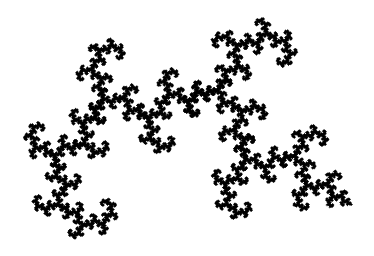

In [23]:
# %matplotlib notebook
fig = plt.figure()
fig.set_size_inches(5, int(5 * (1 + 5 ** 0.5) / 2))
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
A, = ax.plot(x.real, x.imag, 'k.', alpha=0.5, ms=1)

In [ ]:
#N = 5*10**3
N = 10**3

def contractions_interact(alpha_re=0.4614, alpha_im=0.4614,
                 beta_re=0, beta_im=0,
                 gamma_re=0, gamma_im=0,
                 delta_re=0.2896, delta_im=-0.585):
    
    x = np.zeros(N, dtype=complex)
    
    alpha = alpha_re + alpha_im*1j
    beta  = beta_re  + beta_im*1j
    gamma = gamma_re + gamma_im*1j
    delta = delta_re + delta_im*1j
    
    for i in range(1, N):
        if np.random.randint(2):
            x[i] = F1(x[i-1], alpha, beta)
        else:
            x[i] = F2(x[i-1], gamma, delta)
    
    A.set_data(x.real, x.imag)
    plt.draw()


In [24]:
interact(contractions_interact,
        alpha_re=FloatSlider(value=params[0,0].real, min=params[0].real.min(), max=params[0].real.max(), step=0.01),
        alpha_im=FloatSlider(value=params[0,0].imag, min=params[0].imag.min(), max=params[0].imag.max(), step=0.01),
        beta_re =FloatSlider(value=params[1,0].real, min=params[1].real.min(), max=params[1].real.max(), step=0.01),
        beta_im =FloatSlider(value=params[1,0].imag, min=params[1].imag.min(), max=params[1].imag.max(), step=0.01),
        gamma_re=FloatSlider(value=params[2,0].real, min=params[2].real.min(), max=params[2].real.max(), step=0.01),
        gamma_im=FloatSlider(value=params[2,0].imag, min=params[2].imag.min(), max=params[2].imag.max(), step=0.01),
        delta_re=FloatSlider(value=params[3,0].real, min=params[3].real.min(), max=params[3].real.max(), step=0.01),
        delta_im=FloatSlider(value=params[3,0].imag, min=params[3].imag.min(), max=params[3].imag.max(), step=0.01));

NameError: name 'contractions_interact' is not defined

In [25]:
alphas = [0.4614 + 0.4614j, 0,           0,        0.4614 + 0.4614j]
betas  = [0,                (3+3j) / 10, (1+1j)/2, 0               ]
gammas = [0.622 - 0.196j,   0,           0,        0               ]
deltas = [0,                41/50,       (1j-1)/2, 0.2896 - 0.585j ]

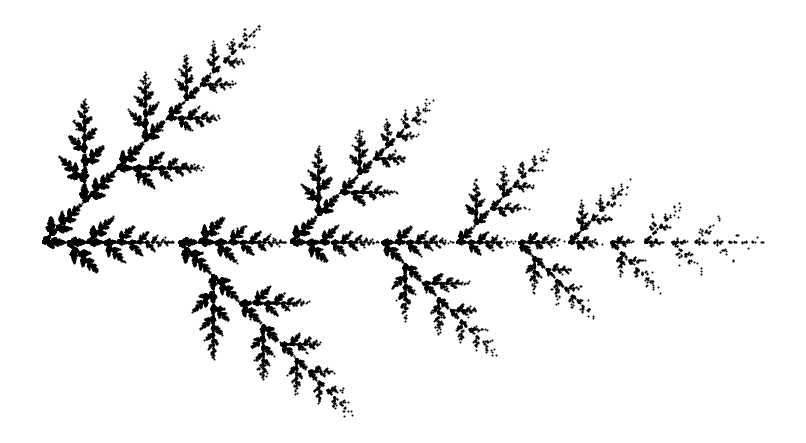

In [26]:
keyframe = np.array([[x.real, x.imag] for x in params[:,1]])
contractions(*keyframe.flatten())

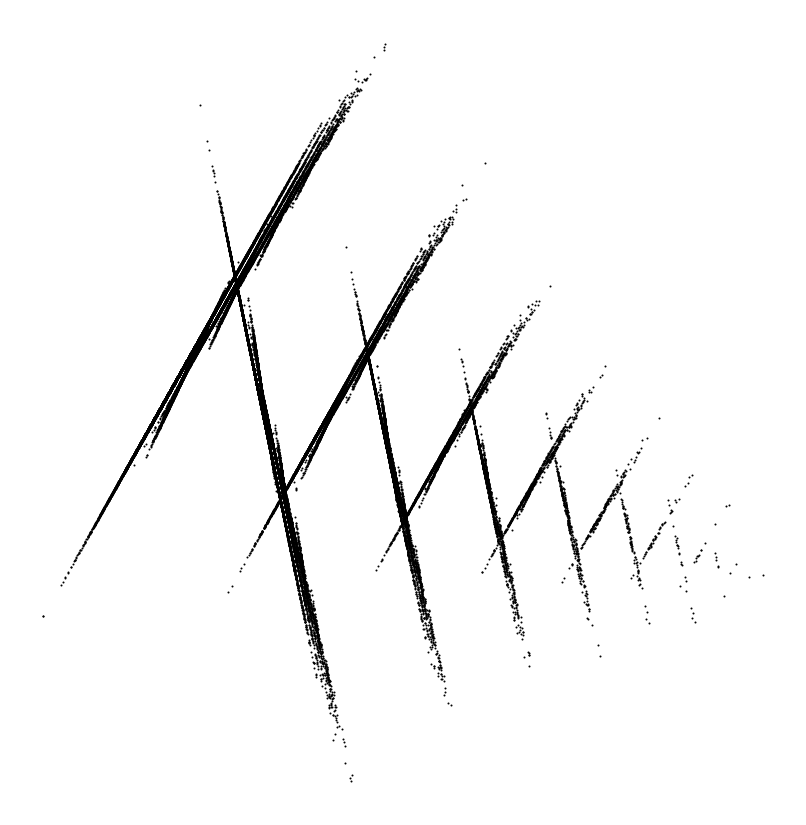

In [27]:
# %matplotlib gtk
contractions(0.46, 0.26, 0, 0.5, 0, -.2, 0.81, -0.42)

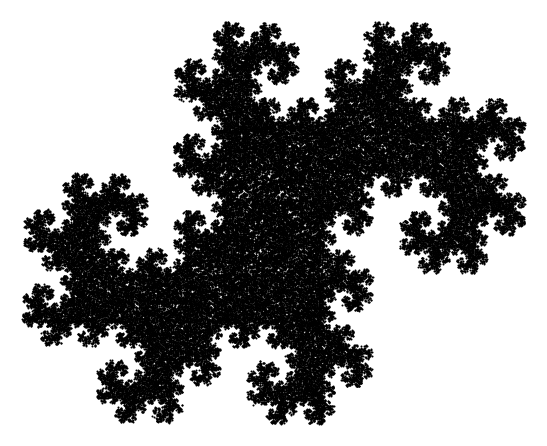

In [4]:
alphas = [0.4614 + 0.4614j, 0,           0,        0.4614 + 0.4614j]
betas  = [0,                (3+3j) / 10, (1+1j)/2, 0               ]
gammas = [0.622 - 0.196j,   0,           0,        0               ]
deltas = [0,                41/50,       (1j-1)/2, 0.2896 - 0.585j ]

params = np.vstack((alphas, betas, gammas, deltas))

def F1(z, alpha, beta):
    return alpha*z + beta*np.conjugate(z)

def F2(z, gamma, delta):
    return gamma*(z-1) + delta*(np.conjugate(z)-1) + 1

#randints = np.random.randint(0, 2, N)

def contractions(alpha_re=0.4614, alpha_im=0.4614,
                 beta_re=0, beta_im=0,
                 gamma_re=0, gamma_im=0,
                 delta_re=0.2896, delta_im=-0.585,
                 N=10**5):
    
    x = np.zeros(N, dtype=complex)
    #x[0] = np.random.random()
    
    alpha = alpha_re + alpha_im*1j
    beta  = beta_re  + beta_im*1j
    gamma = gamma_re + gamma_im*1j
    delta = delta_re + delta_im*1j
    
    for i in range(1, N):
        if np.random.randint(2):
        #if i % 3 == 0:
            x[i] = F1(x[i-1], alpha, beta)
        else:
            x[i] = F2(x[i-1], gamma, delta)
    
    fig = plt.figure()
    fig.set_size_inches(int(6 * (1 + 5 ** 0.5) / 2), 6)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    xlim = [min(x.real)-0.05, max(x.real)+0.05]
    ylim = [min(x.imag)-0.05, max(x.imag)+0.05]
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    #plt.suptitle(r'$\{ z \rightarrow \alpha z + \beta \bar z,\qquad' + \
    #             r'z \rightarrow \gamma (z-1) + \delta (\bar z - 1) + 1 \}$',
    #            y=1.08, c='#1669BA', alpha=0.25)
    plt.plot(x.real, x.imag, 'k.', alpha=1, ms=2, zorder=1)
    #plt.text(0.25, -0.08, s=r'Earl Patrick Bellinger', c='#1669BA', alpha=0.25, zorder=0,
    #    fontdict={'family': 'serif', 'size': 22},
    #    horizontalalignment='center',
    #    verticalalignment='center',
    #    transform = ax.transAxes)
    #plt.text(0.9, -0.01, s=r'$\alpha = ' + f'{alpha:.3f}' + '$\n' \
    #                     + r'$\beta  = ' + f'{beta:.3f}'  + '$\n' \
    #                     + r'$\gamma = ' + f'{gamma:.3f}' + '$\n' \
    #                     + r'$\delta = ' + f'{delta:.3f}' + '$\n',
    #     horizontalalignment='center',
    #     verticalalignment='center',
    #     c='#1669BA', zorder=0, alpha=0.25, 
    #     transform = ax.transAxes)
    plt.show()

contractions(0.495, -0.5, 0, 0, 0.5, -0.5, 0, 0, N=10**5)

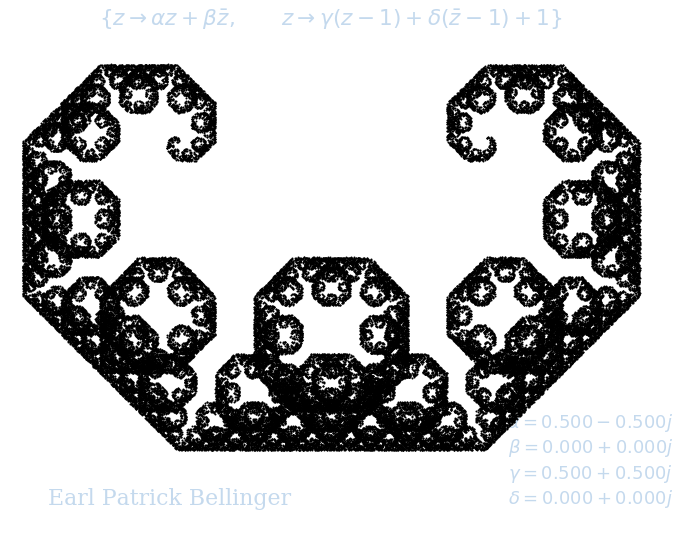

In [38]:
contractions(0.5, -0.5, 0, 0, 0.5, 0.5, 0, 0, N=10**5)

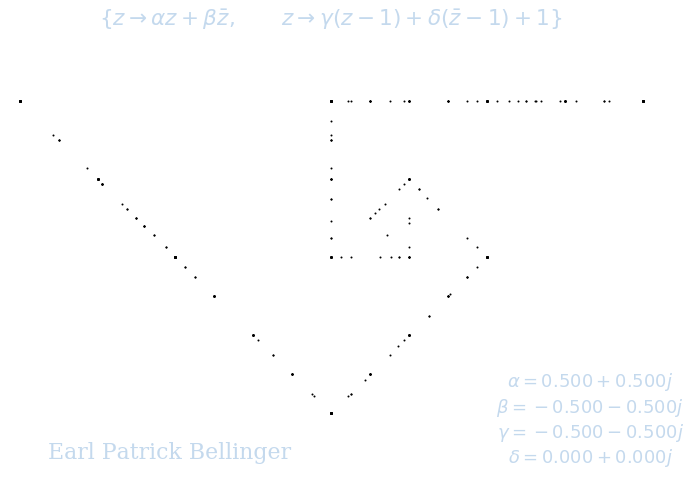

In [75]:
contractions(0.5, 0.5, -0.5, -0.5, -0.5, -0.5, 0, 0, N=10**3)

In [6]:
interact(contractions,
        alpha_re=FloatSlider(value=0, min=-1, max=1, step=0.05),
        alpha_im=FloatSlider(value=0, min=-1, max=1, step=0.05),
        beta_re =FloatSlider(value=0, min=-1, max=1, step=0.05),
        beta_im =FloatSlider(value=0, min=-1, max=1, step=0.05),
        gamma_re=FloatSlider(value=0, min=-1, max=1, step=0.05),
        gamma_im=FloatSlider(value=0, min=-1, max=1, step=0.05),
        delta_re=FloatSlider(value=0, min=-1, max=1, step=0.05),
        delta_im=FloatSlider(value=0, min=-1, max=1, step=0.05),
        N=IntSlider(value=100, min=10, max=5000));

interactive(children=(FloatSlider(value=0.0, description='alpha_re', max=1.0, min=-1.0, step=0.05), FloatSlide…

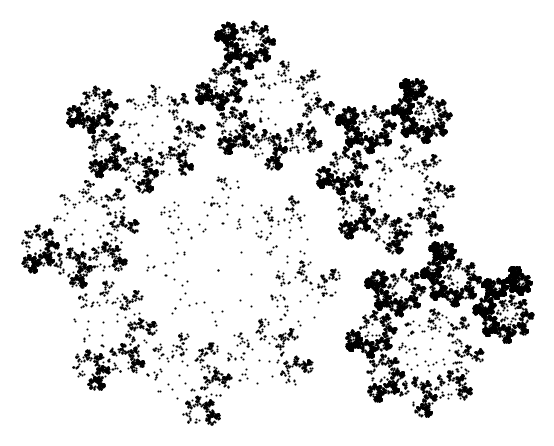

In [18]:
contractions(2*np.pi/10, 2*np.pi/10, 0, 0, np.e/10, np.e/10, 0, 0, N=10**5)

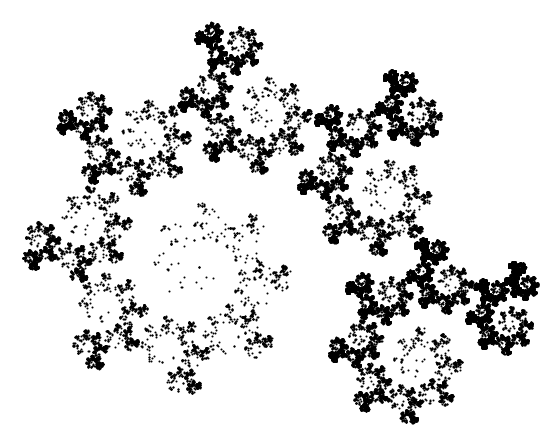

In [20]:
contractions(0.6, 0.6, 0, 0, 0.3, 0.3, 0, 0, N=10**5)